In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
import torch
from torch import nn
import matplotlib.pyplot as plt

In [51]:
x = torch.linspace(0,3,100)
x

tensor([0.0000, 0.0303, 0.0606, 0.0909, 0.1212, 0.1515, 0.1818, 0.2121, 0.2424,
        0.2727, 0.3030, 0.3333, 0.3636, 0.3939, 0.4242, 0.4545, 0.4848, 0.5152,
        0.5455, 0.5758, 0.6061, 0.6364, 0.6667, 0.6970, 0.7273, 0.7576, 0.7879,
        0.8182, 0.8485, 0.8788, 0.9091, 0.9394, 0.9697, 1.0000, 1.0303, 1.0606,
        1.0909, 1.1212, 1.1515, 1.1818, 1.2121, 1.2424, 1.2727, 1.3030, 1.3333,
        1.3636, 1.3939, 1.4242, 1.4545, 1.4848, 1.5152, 1.5455, 1.5758, 1.6061,
        1.6364, 1.6667, 1.6970, 1.7273, 1.7576, 1.7879, 1.8182, 1.8485, 1.8788,
        1.9091, 1.9394, 1.9697, 2.0000, 2.0303, 2.0606, 2.0909, 2.1212, 2.1515,
        2.1818, 2.2121, 2.2424, 2.2727, 2.3030, 2.3333, 2.3636, 2.3939, 2.4242,
        2.4545, 2.4848, 2.5152, 2.5455, 2.5758, 2.6061, 2.6364, 2.6667, 2.6970,
        2.7273, 2.7576, 2.7879, 2.8182, 2.8485, 2.8788, 2.9091, 2.9394, 2.9697,
        3.0000])

In [52]:
class SphericalBessel(nn.Module):
    def __init__(self, k: int = 1, l: int = 0):
        super().__init__()
        self.k = k
        self.l = l

    def forward(self, x):
        x = x.to(torch.float64)*self.k
        y = torch.zeros([self.l]+[s for s in x.shape], dtype=torch.float64)

        lstart = self.l + int(torch.sqrt(torch.Tensor([10*self.l])))
        j2 = torch.zeros_like(x, dtype=torch.float64)
        j1 = torch.ones_like(x, dtype=torch.float64)

        for i in range(lstart, 0, -1):
            j0 = (2*i+1)/x * j1 - j2
            if i-1<self.l:
                y[i-1,...] = j0
            j2 = j1
            j1 = j0


        true_j0 = torch.sinc(x/torch.pi)
        y = y * true_j0/y[0,...]
        return y.to(torch.float32)

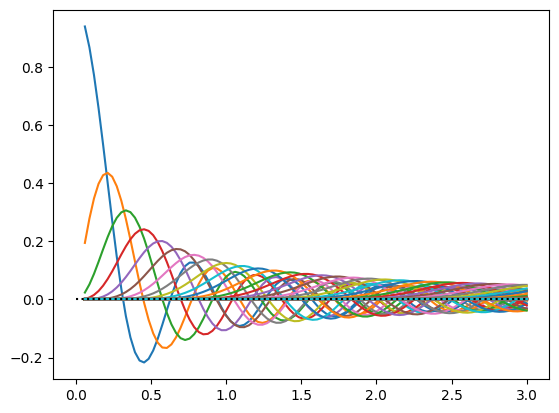

In [58]:
bessel = SphericalBessel(k=10, l=100)
y = bessel(x)
plt.plot(x, y.T)

plt.plot([0,torch.max(x)],[0,0], ':k')